In [169]:
%matplotlib inline
%load_ext autoreload
%autoreload

from quanty.model import backtester as q
from quanty.model import backtester_base as q_base
from quanty.model import db_manager as dm
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
from quanty.model.dual_momentum import DualMomentumSelector, DualMomentumPort

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [170]:
db = dm.read_db(base='prices_global.pkl', add=['prices_kr.pkl'])
db_kr = dm.read_db(base='prices_kr.pkl', add=['prices_global.pkl'])

# Multiasset model

In [180]:
multiasset = q.Backtester(
    setting.base_params(db), 
    w_type='inv_ranky2', 
    rebal_style='cum', 
    n_picks=10, 
    assets=setting.assets_multiasset, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,1,2,3], #[1,0,0,0,0,0,1,0,0,0.25*4,0.25*6,0.25*12], #
    sig_w_dynamic=True, #False, 
    sig_dyn_fwd=21*np.array([1,2,3]), 
    #sig_dyn_m_backs=24, 
    follow_trend=None, #(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='BND_US_HY', #'ACWI', 
    supporter='BND_US_Long', 
    cash_equiv='BND_US_Tbill', 
    start='2007-12-31', 
    end='2018-09-30', 
    losscut=0.05, 
    profitake_sigma=3, 
    rentry_sigma=2, 
)


8.891999959945679


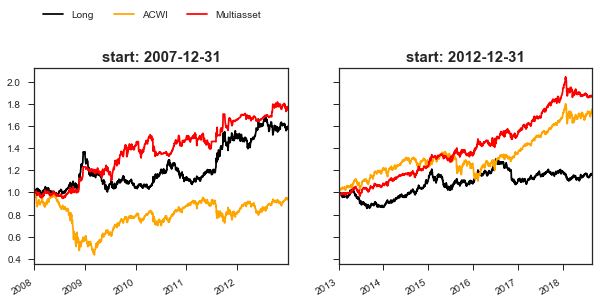

In [175]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'Multiasset']
color = ['k', 'orange', 'r']

multiasset.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

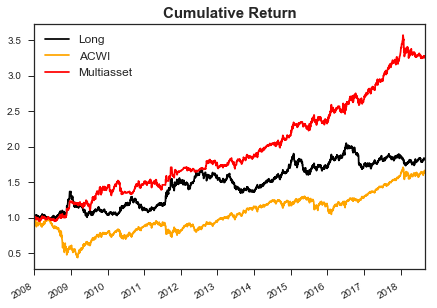

In [176]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'Multiasset']
color = ['k', 'orange', 'r']

multiasset.plot_cum(strats, names=names, color=color, logy=False)

In [183]:
rt = multiasset.cum.DualMomentum.resample('M').ffill().pct_change()
rt[rt<-0.05]

2009-04-30   -0.058353
2010-05-31   -0.084360
2018-02-28   -0.051466
Name: DualMomentum, dtype: float64

In [184]:
multiasset.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
Latam,0.82,2708,-1.76,34.25,-0.05,-67.48,-1.68,26.49,-0.07,1.36,51.85,48.44,1.14,3.62
BND_EmSov_usd,1.79,2708,5.52,10.66,0.52,-34.70,7.15,7.20,0.99,0.14,24.60,66.41,0.84,88.38
Agriculture,0.52,2708,-5.82,18.06,-0.32,-60.05,-5.57,11.86,-0.47,0.34,69.34,42.97,1.07,63.48
BND_GlobalSov_loch,1.20,1446,3.25,2.79,1.17,-4.05,2.90,2.99,1.14,-0.02,5.60,67.16,1.21,93.08
DualMomentum,3.21,2708,11.38,12.45,0.91,-12.79,12.46,11.80,1.02,0.11,1.02,58.59,1.65,97.94


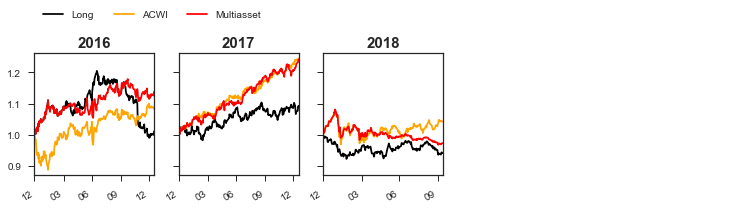

In [185]:
multiasset.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2016))

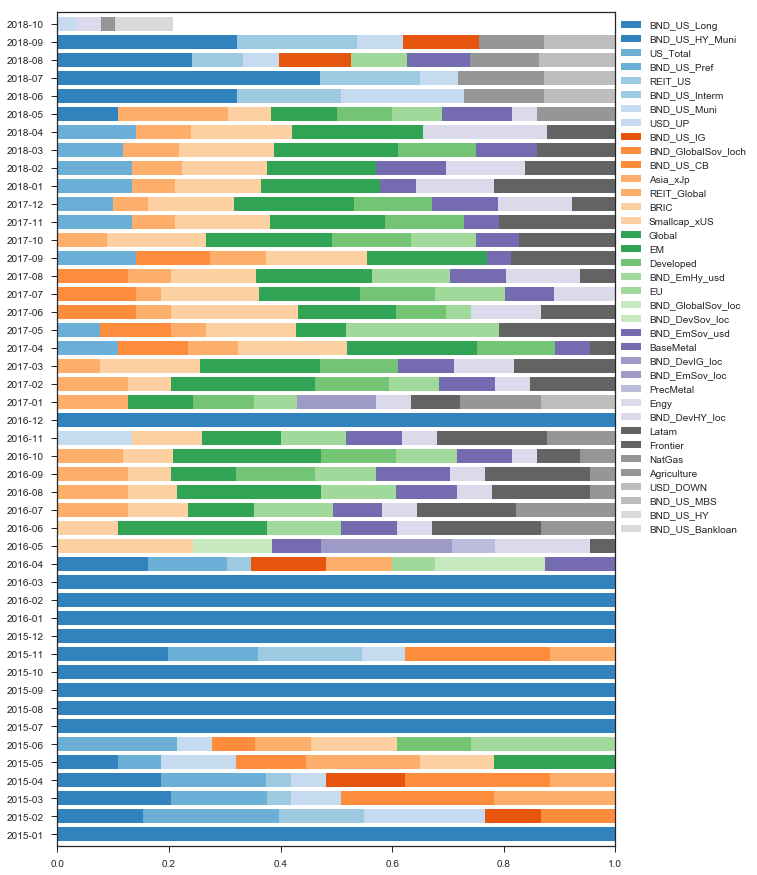

In [186]:
multiasset.plot_weight([2015, 2018])

# Global equity allocation model

In [189]:
geam = q.Backtester(
    setting.base_params(db), 
    w_type='inv_ranky2', 
    rebal_style='cum', 
    n_picks=10, 
    assets=setting.assets_global_eq, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,0,0,0], 
    sig_w_dynamic=True, #False, 
    sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_m_backs=24, 
    follow_trend=(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='ACWI', 
    supporter='BND_US_Long', 
    cash_equiv='BND_US_Tbill', 
    start='2007-12-31', 
    end='2018-09-30', 
    losscut=0.05, 
    profitake_sigma=3, 
    rentry_sigma=2, 
)


8.735999822616577


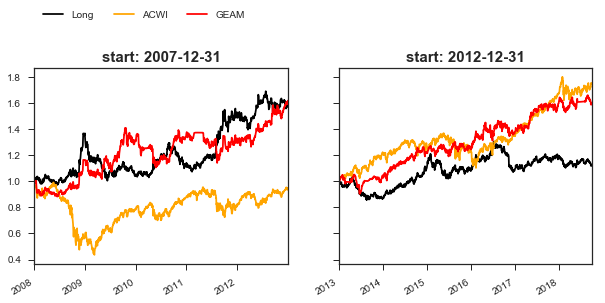

In [191]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GEAM']
color = ['k', 'orange', 'r']

geam.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

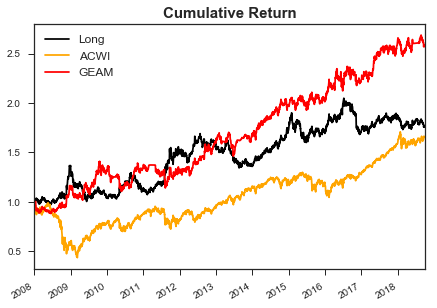

In [192]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GEAM']
color = ['k', 'orange', 'r']

geam.plot_cum(strats, names=names, color=color, logy=False)

In [190]:
geam.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
Brazil,0.58,2708,-4.87,38.56,-0.13,-77.25,-5.21,32.19,-0.18,1.42,56.16,49.22,1.06,25.20
Japan,1.33,2708,2.66,22.15,0.12,-49.67,6.71,18.13,0.38,0.86,32.41,58.59,0.87,-22.08
Egypt,0.32,2708,-10.07,30.17,-0.33,-78.05,-7.36,29.73,-0.26,0.36,61.24,49.22,0.93,15.42
SouthAfrica,1.15,2708,1.30,36.48,0.04,-61.22,5.79,28.93,0.20,1.41,38.27,54.69,0.97,26.38
DualMomentum,2.58,2708,9.17,14.60,0.63,-21.52,10.44,13.95,0.79,0.13,10.41,57.81,1.30,96.10


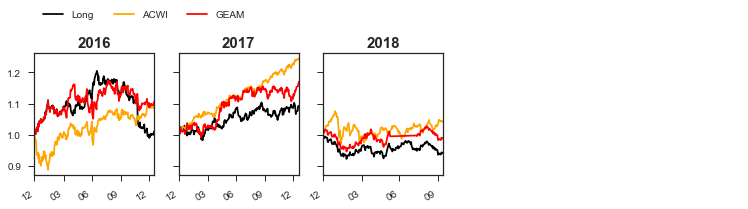

In [193]:
geam.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2016))

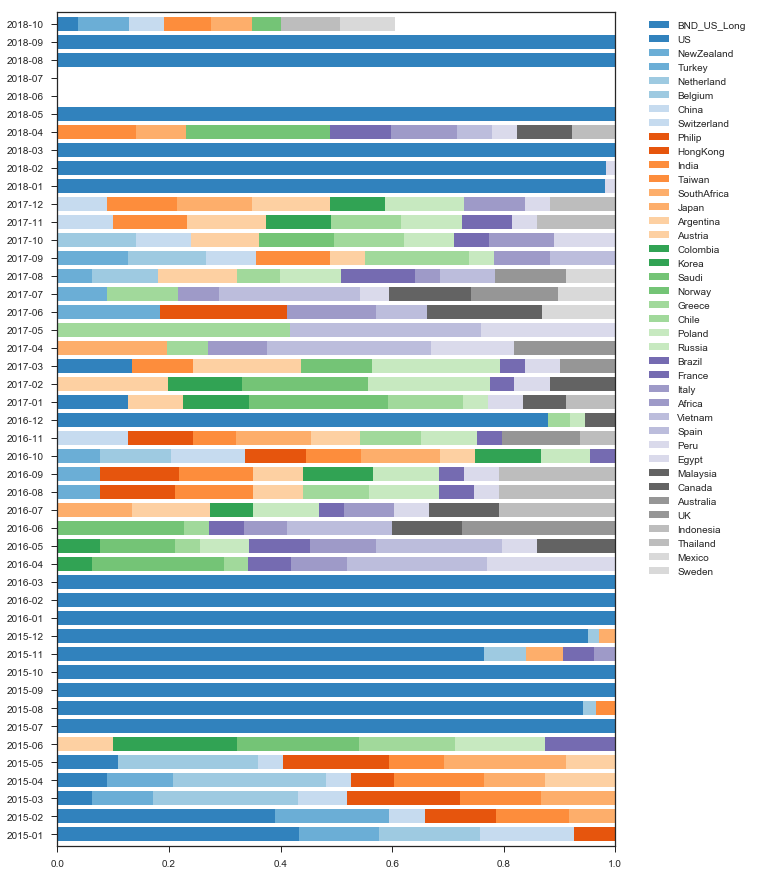

In [194]:
geam.plot_weight([2015, 2018])

# Global sector allocation model

In [197]:
gsam = q.Backtester(
    setting.base_params(db), 
    w_type='inv_ranky2', 
    rebal_style='cum', 
    n_picks=10, 
    assets=setting.assets_global_sector, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,0,0,0], 
    sig_w_dynamic=True, 
    sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_m_backs=24, 
    #sig_dyn_thres=0.0, 
    follow_trend=(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='ACWI', 
    supporter='BND_US_Long', 
    cash_equiv='BND_US_Tbill', 
    start='2007-12-31', 
    end='2018-09-30', 
    losscut=0.05,
    profitake_sigma=3, 
    rentry_sigma=2, 
)


9.967696905136108


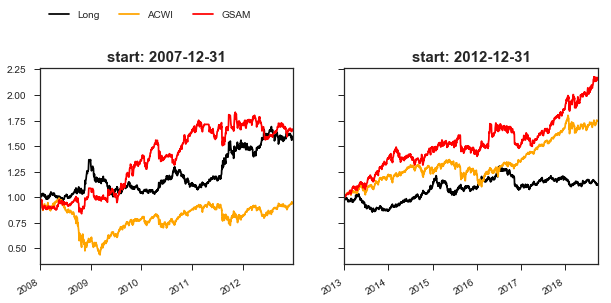

In [199]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GSAM']
color = ['k', 'orange', 'r']

gsam.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

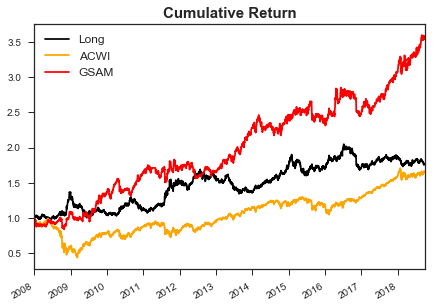

In [200]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GSAM']
color = ['k', 'orange', 'r']

gsam.plot_cum(strats, names=names, color=color, logy=False)

In [198]:
gsam.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
ConsumerGoods,2.36,2708,8.27,15.74,0.53,-40.81,12.34,12.53,1.03,0.64,11.10,60.94,1.12,80.24
MLP,1.68,2708,4.90,23.30,0.21,-53.06,7.95,15.10,0.61,0.63,32.13,58.59,0.97,48.71
Lithium,1.26,2353,2.49,23.54,0.11,-61.91,-1.87,20.69,-0.08,1.15,52.99,52.25,1.11,-3.38
Bank,1.31,2708,2.49,37.95,0.07,-79.49,10.36,22.18,0.53,1.30,31.68,57.03,0.92,-57.12
DualMomentum,3.59,2708,12.52,16.15,0.78,-16.62,11.95,14.62,0.75,0.31,12.48,60.94,1.25,94.23


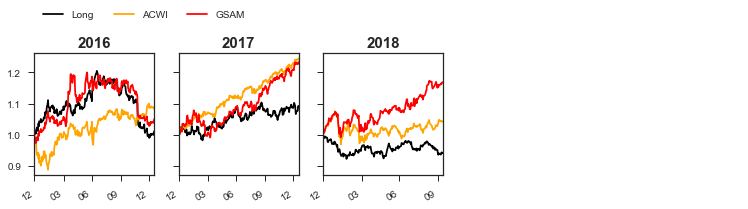

In [201]:
gsam.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2016))

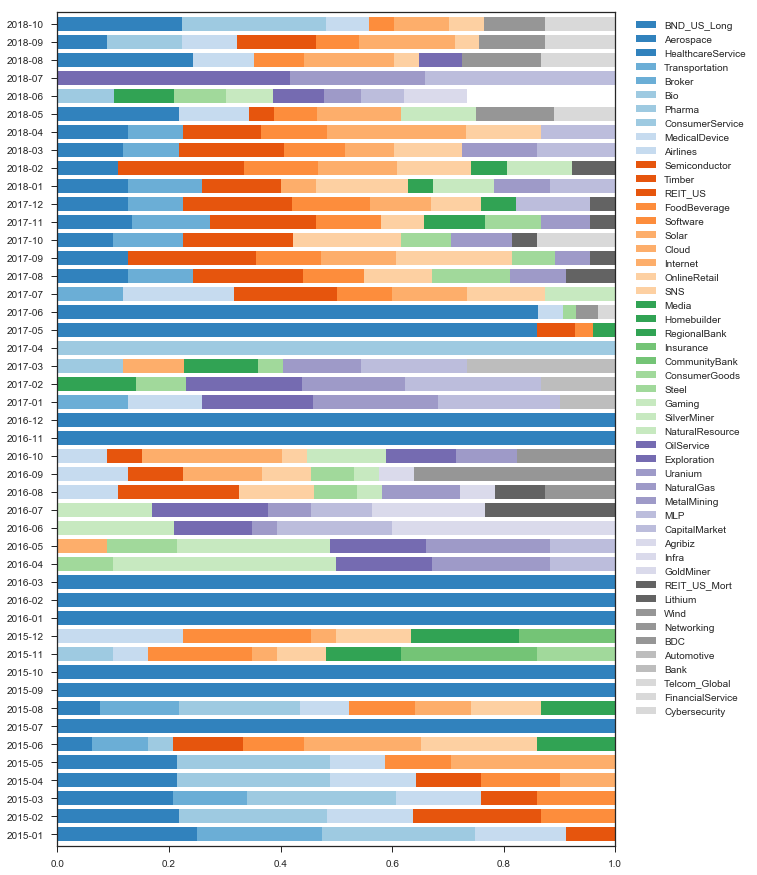

In [202]:
gsam.plot_weight([2015, 2018])

# Global bond allocation model

In [128]:
%matplotlib inline
%load_ext autoreload
%autoreload

from quanty.model import backtester as q
from quanty.model import backtester_base as q_base
from quanty.model import db_manager as dm
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
from quanty.model.dual_momentum import DualMomentumSelector, DualMomentumPort

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [205]:
gbam = q.Backtester(
    setting.base_params(db), 
    w_type='inv_ranky2', 
    rebal_style='cum', 
    freq='1M', 
    n_picks=5, 
    assets=setting.assets_fi, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,0,0,0], 
    sig_w_dynamic=True, 
    sig_dyn_fwd=21*np.array([1,2,3]), 
    #sig_dyn_thres=0.1, 
    #sig_dyn_m_backs=12, 
    follow_trend=None, #(60,250), 
    follow_trend_market=None, #(20,60), 
    follow_trend_supporter=(20,60), 
    strong_condition=True, 
    market='BND_US_Interm', #'BND_GlobalSov_loch', #'BND_US_AGG', 
    supporter='ACWI', 
    cash_equiv='BND_US_Long', 
    start='2007-12-31', 
    end='2018-09-30', 
    losscut=1.03, 
    profitake_sigma=30,
    rentry_sigma=20, 
)


6.239560127258301


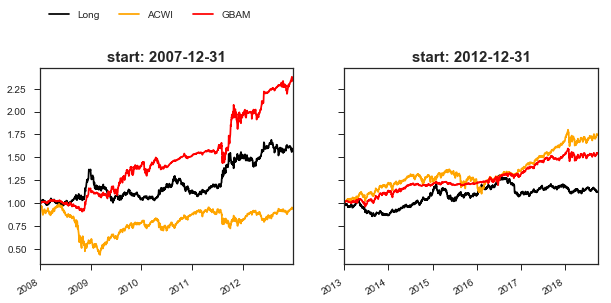

In [207]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GBAM']
color = ['k', 'orange', 'r']

gbam.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

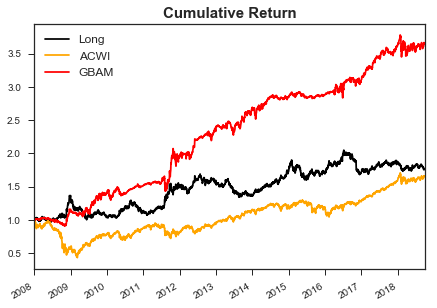

In [208]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GBAM']
color = ['k', 'orange', 'r']

gbam.plot_cum(strats, names=names, color=color, logy=False)

In [206]:
gbam.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
BND_DevSov_loc,1.20,2708,1.68,8.98,0.19,-15.77,1.51,8.65,0.17,0.07,41.28,56.25,0.94,-17.05
BND_US_Bankloan,1.55,2708,4.15,4.90,0.85,-32.43,3.52,3.29,1.62,0.07,17.08,64.06,1.01,77.23
BND_EmSov_usd,1.79,2708,5.52,10.66,0.52,-34.70,7.15,7.20,0.99,0.14,24.60,66.41,0.84,88.38
BND_EmSov_loc,1.20,2708,1.71,10.99,0.16,-32.01,3.83,10.19,0.34,0.28,42.78,60.94,0.76,-2.42
DualMomentum,3.65,2708,12.69,12.71,1.00,-13.35,11.71,10.51,1.08,0.25,1.83,65.62,1.47,94.16


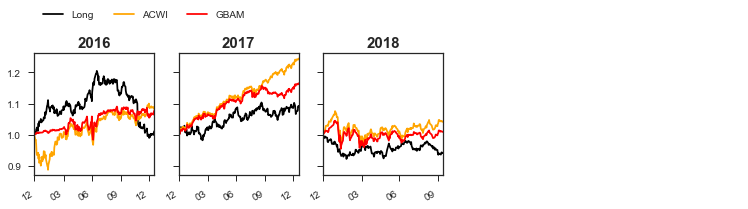

In [209]:
gbam.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2016))

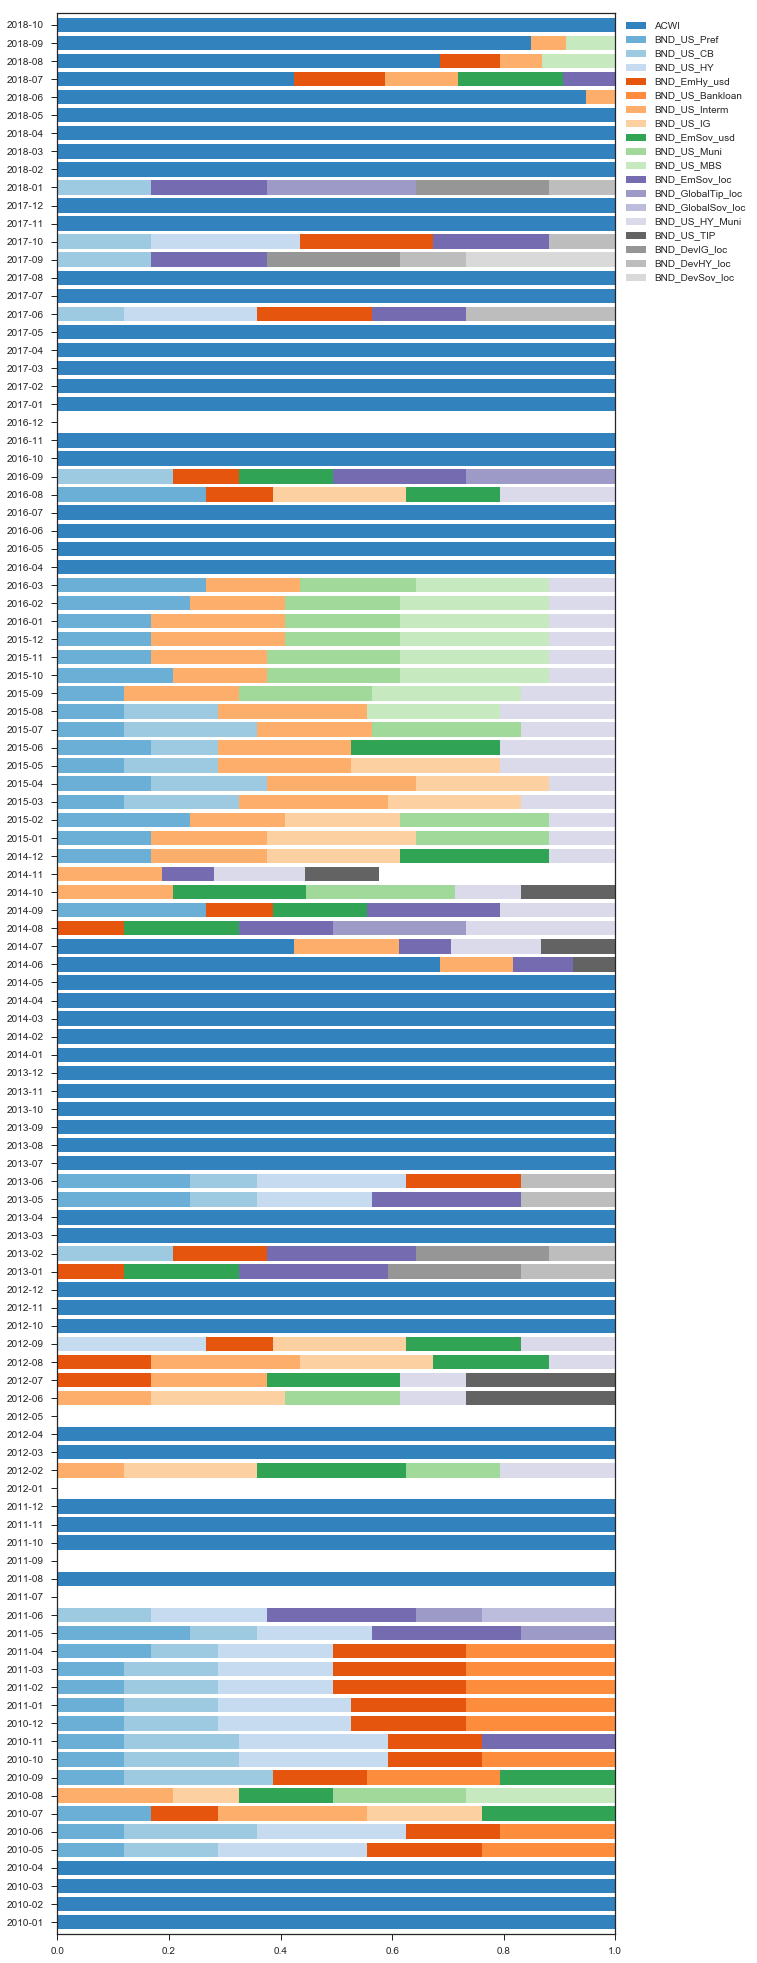

In [210]:
gbam.plot_weight([2010, 2018])

In [371]:
%matplotlib inline
%load_ext autoreload
%autoreload

from quanty.model import backtester as q
from quanty.model import db_manager as dm
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
from quanty.model.dual_momentum import DualMomentumSelector, DualMomentumPort

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Korea factor allocation model

In [212]:
kfam = q.Backtester(
    setting.base_params(db_kr), 
    w_type='inv_ranky2', 
    rebal_style='cum', 
    freq='1M', 
    n_picks=5, 
    assets=setting.assets_kr_factor, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,1,2,3], 
    sig_w_dynamic=True, 
    sig_dyn_fwd=21*np.array([1,2,3]), 
    #sig_dyn_m_backs=12, 
    follow_trend=None, #(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='K200', 
    supporter='KTB10YL', 
    cash_equiv= 'KTB10Y', 
    #trade_assets=[('K200', {'K200L':0.5})], 
    start='2007-12-31', 
    end='2018-08-31', 
    losscut=1.05, 
    profitake_sigma=10, 
    rentry_sigma=2, 
)


5.974685192108154


In [157]:
kfam = q.Backtester(
    setting.base_params(db_kr), 
    w_type='inv_ranky2', 
    rebal_style='cum', 
    freq='1M', 
    n_picks=5, 
    assets=setting.assets_kr_factor, 
    sig_w_base=[0,0,0,0,0,0,1,0,0,0,0,0], 
    sig_w_dynamic=False, 
    sig_dyn_fwd=21*np.array([1,2,3]), 
    #sig_dyn_m_backs=12, 
    follow_trend=None, #(20,60), 
    follow_trend_market=None, #(20,60), 
    follow_trend_supporter=None, #(60,250), 
    strong_condition=False, 
    market='K200', 
    supporter='KTB10YL', 
    cash_equiv= 'KTB10Y', 
    start='2007-12-31', 
    losscut=1.05, 
    profitake_sigma=10, 
    rentry_sigma=2, 
)


5.693817615509033


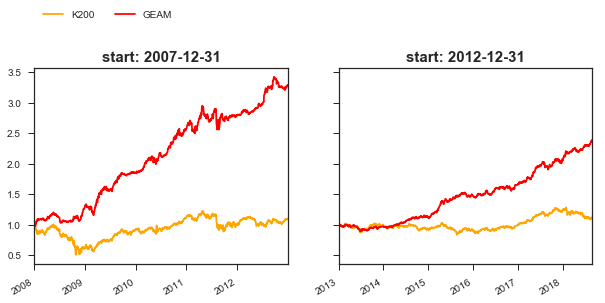

In [323]:
strats = ['K200', 'DualMomentum']
names = ['K200', 'GEAM']
color = ['orange', 'r']

kfam.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

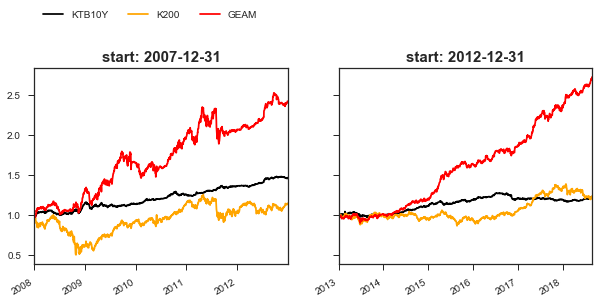

In [213]:
strats = ['KTB10Y', 'K200', 'DualMomentum']
names = ['KTB10Y', 'K200', 'GEAM']
color = ['k', 'orange', 'r']

kfam.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

In [166]:
db_kr.reprice.unstack().KTB10Y.dropna().loc['2011-12-29':]

2011-12-29    100725.0
2012-01-02    100630.0
2012-01-03    100605.0
2012-01-04    100540.0
2012-01-05    100695.0
2012-01-06    100780.0
2012-01-09    100710.0
2012-01-10    100655.0
2012-01-11    100700.0
2012-01-12    100735.0
2012-01-13    100775.0
2012-01-16    100795.0
2012-01-17    100750.0
2012-01-18    100795.0
2012-01-19    100815.0
2012-01-20    100620.0
2012-01-25    100715.0
2012-01-26    100750.0
2012-01-27    100750.0
2012-01-30    100985.0
2012-01-31    101120.0
2012-02-01    101155.0
2012-02-02    101100.0
2012-02-03    101150.0
2012-02-06    100990.0
2012-02-07    100930.0
2012-02-08    100680.0
2012-02-09    100720.0
2012-02-10    100800.0
2012-02-13    100740.0
                ...   
2018-07-20    117320.0
2018-07-23    117300.0
2018-07-24    116910.0
2018-07-25    117050.0
2018-07-26    117050.0
2018-07-27    116965.0
2018-07-30    116965.0
2018-07-31    117150.0
2018-08-01    116810.0
2018-08-02    116895.0
2018-08-03    117000.0
2018-08-06    116970.0
2018-08-07 

In [168]:
db_kr.close.unstack().KTB10Y.dropna().loc['2011-12-29':]

2011-12-29    100725.0
2012-01-02    100630.0
2012-01-03    100605.0
2012-01-04    100540.0
2012-01-05    100695.0
2012-01-06    100780.0
2012-01-09    100710.0
2012-01-10    100655.0
2012-01-11    100700.0
2012-01-12    100735.0
2012-01-13    100775.0
2012-01-16    100795.0
2012-01-17    100750.0
2012-01-18    100795.0
2012-01-19    100815.0
2012-01-20    100620.0
2012-01-25    100715.0
2012-01-26    100750.0
2012-01-27    100750.0
2012-01-30    100985.0
2012-01-31    101120.0
2012-02-01    101155.0
2012-02-02    101100.0
2012-02-03    101150.0
2012-02-06    100990.0
2012-02-07    100930.0
2012-02-08    100680.0
2012-02-09    100720.0
2012-02-10    100800.0
2012-02-13    100740.0
                ...   
2018-07-20    117320.0
2018-07-23    117300.0
2018-07-24    116910.0
2018-07-25    117050.0
2018-07-26    117050.0
2018-07-27    116965.0
2018-07-30    116965.0
2018-07-31    117150.0
2018-08-01    116810.0
2018-08-02    116895.0
2018-08-03    117000.0
2018-08-06    116970.0
2018-08-07 

In [167]:
119495/100725-1

0.18634896996773387

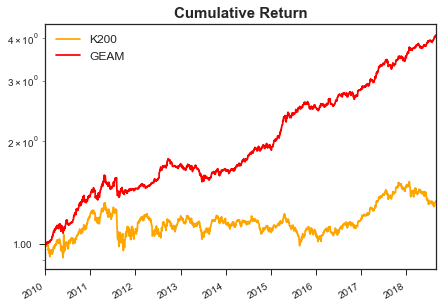

In [8]:
strats = ['K200', 'DualMomentum']
names = ['K200', 'GEAM']
color = ['orange', 'r']

kfam.plot_cum(strats, names=names, color=color, logy=True, start='2009-12-31')

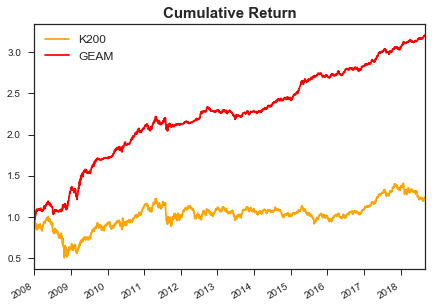

In [330]:
strats = ['K200', 'DualMomentum']
names = ['K200', 'GEAM']
color = ['orange', 'r']

kfam.plot_cum(strats, names=names, color=color, logy=False)

In [5]:
kfam.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
HighDvd_kr,1.88,2767,5.87,15.26,0.38,-44.43,10.90,11.08,1.01,0.21,19.90,60.63,0.96,72.64
ACWI,1.64,2767,4.60,20.94,0.22,-56.41,11.04,15.39,0.73,1.00,24.82,60.63,0.88,23.18
K200,1.24,2767,1.93,20.75,0.09,-49.63,2.63,13.37,0.18,0.30,41.66,57.48,0.88,18.48
Contrarian_kr,1.57,2767,4.16,22.64,0.18,-60.07,7.16,15.11,0.53,0.31,32.17,59.06,0.92,60.01
DualMomentum,7.77,2767,20.36,11.04,1.84,-14.38,19.89,9.18,2.21,0.05,9.25,72.44,1.42,89.31


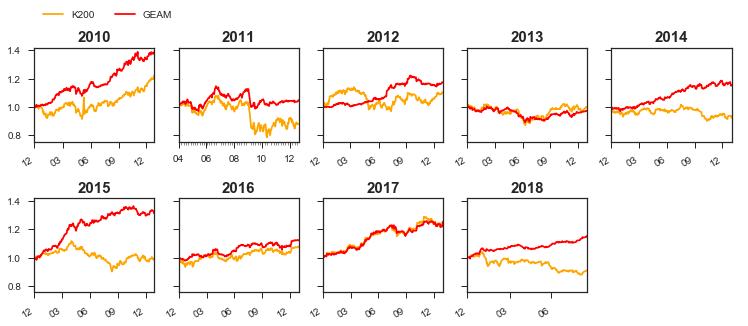

In [271]:
kfam.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2010))

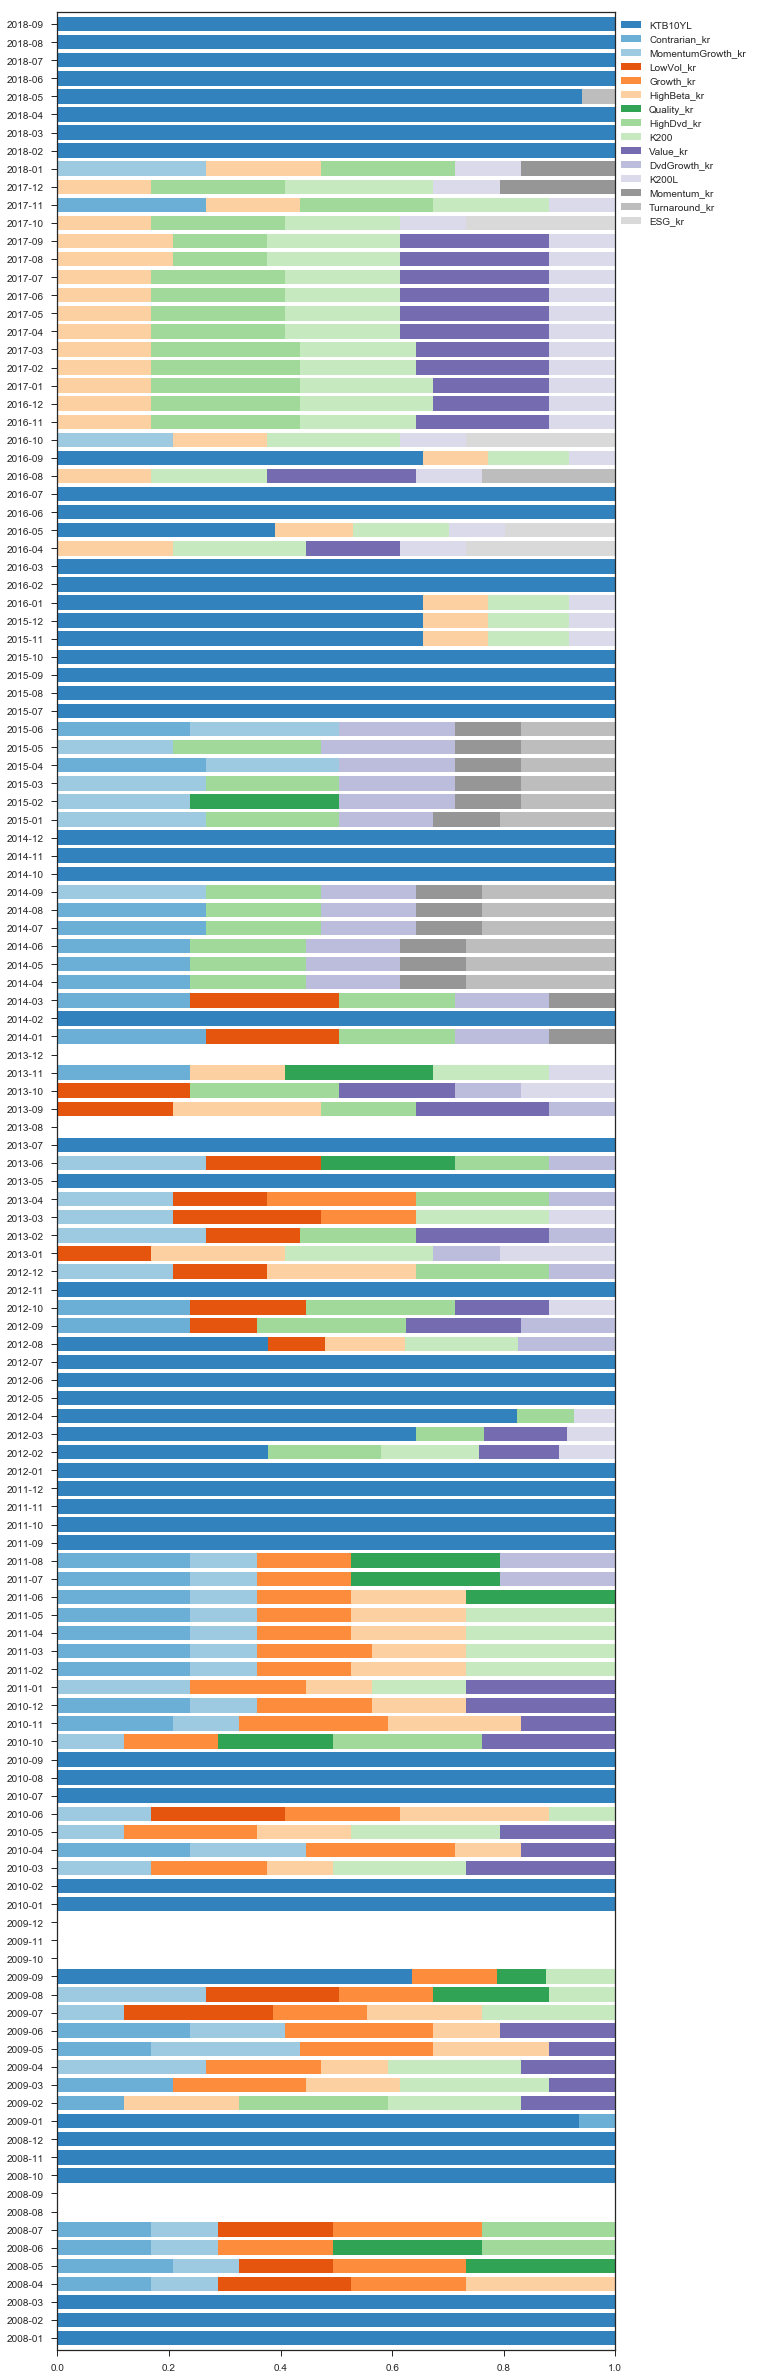

In [272]:
kfam.plot_weight([2003, 2018])

# Global factor allocation model

In [209]:
%matplotlib inline
%load_ext autoreload
%autoreload

from quanty.model import backtester as q
from quanty.model import db_manager as dm
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
from quanty.model.dual_momentum import DualMomentumSelector, DualMomentumPort

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [104]:
gfam = q.Backtester( 
    setting.base_params(db), 
    w_type='inv_ranky2', # ranky2 가 더 잘나오긴 한다. ----
    rebal_style='cum', 
    freq='1M', 
    n_picks=5, 
    assets=setting.assets_global_factor, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,0,0,0], 
    sig_w_dynamic=True, 
    sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_m_backs=12, 
    follow_trend=(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='ACWI', 
    supporter='KTB10YL', #'BND_US_Long', 
    cash_equiv= 'BND_US_Long', 
    start='2007-12-31', 
    losscut=1.05, 
    profitake_sigma=10, 
    rentry_sigma=20, 
)

HBox(children=(IntProgress(value=0, max=129), HTML(value='')))


25.194225549697876


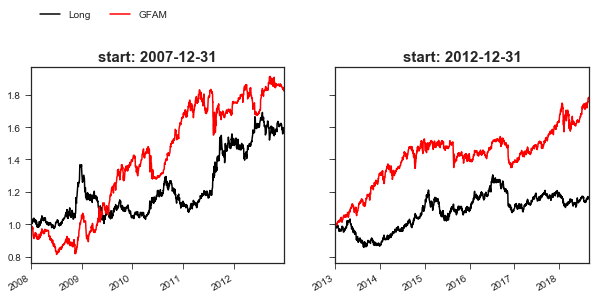

In [106]:
strats = ['BND_US_Long', 'DualMomentum']
names = ['Long', 'GFAM']
color = ['k', 'r']

gfam.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

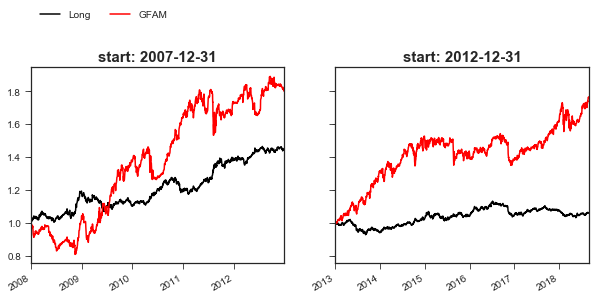

In [101]:
strats = ['BND_US_Interm', 'DualMomentum']
names = ['Long', 'GFAM']
color = ['k', 'r']

gfam.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

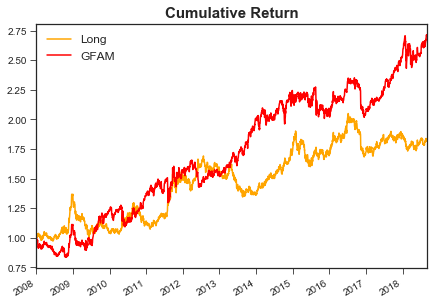

In [96]:
strats = ['BND_US_Long', 'DualMomentum']
names = ['Long', 'GFAM']
color = ['orange', 'r']

gfam.plot_cum(strats, names=names, color=color, logy=False)

# Advanced Dual Momentum

In [145]:
adm = q.Backtester( 
    setting.base_params(db), 
    w_type='inv_ranky2', # ranky2 가 더 잘나오긴 한다. ----
    rebal_style='cum', 
    freq='1M', 
    n_picks=1, 
    assets=setting.assets_adm, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,1,0,1], 
    sig_w_dynamic=False, 
    sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_m_backs=12, 
    follow_trend=None, #(20,60), 
    follow_trend_market=None, #(20,60), 
    follow_trend_supporter=(20,60), 
    strong_condition=True, 
    market=None, #'ACWI', 
    supporter='BND_US_Long', 
    cash_equiv= 'BND_US_Interm', 
    start='2007-12-31', 
    losscut=1.05, 
    profitake_sigma=30, 
    rentry_sigma=20, 
)

HBox(children=(IntProgress(value=0, max=129), HTML(value='')))


22.06151580810547


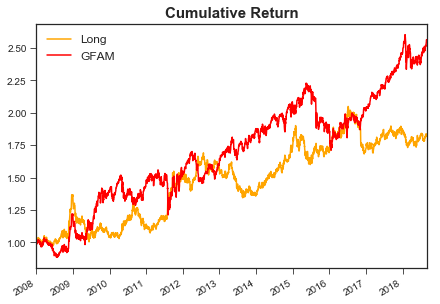

In [138]:
strats = ['BND_US_Long', 'DualMomentum']
names = ['Long', 'GFAM']
color = ['orange', 'r']

adm.plot_cum(strats, names=names, color=color, logy=False)

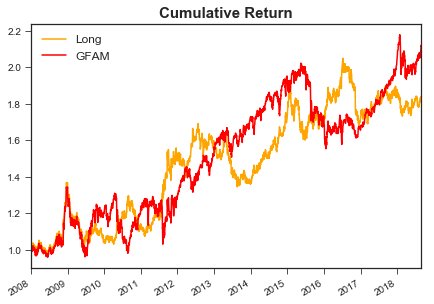

In [146]:
strats = ['BND_US_Long', 'DualMomentum']
names = ['Long', 'GFAM']
color = ['orange', 'r']

adm.plot_cum(strats, names=names, color=color, logy=False)

In [350]:
%matplotlib inline
%load_ext autoreload
%autoreload

from quanty.model import backtester as q
from quanty.model import db_manager as dm
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
from quanty.model.dual_momentum import DualMomentumSelector, DualMomentumPort

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [336]:
mix = q_base.BacktestComparator(setting.base_params(db), multiasset=multiasset, geam=geam, kfam=kfam, gsam=gsam, gfam=gfam)
mix.mix()

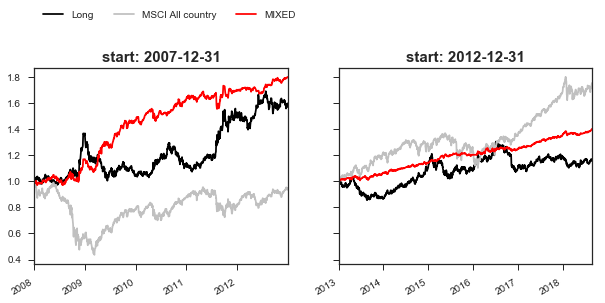

In [337]:
strats = ['BND_US_Long', 'ACWI', 'mixed']
names = ['Long', 'MSCI All country', 'MIXED']
color = ['k', 'silver', 'r']

mix.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

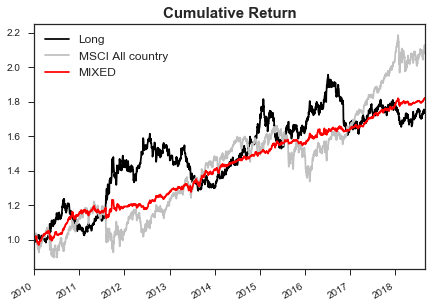

In [353]:
strats = ['BND_US_Long', 'ACWI', 'mixed']
names = ['Long', 'MSCI All country', 'MIXED']
color = ['k', 'silver', 'r']

mix.plot_cum(strats, names=names, color=color, logy=False, start='2009-12-31')

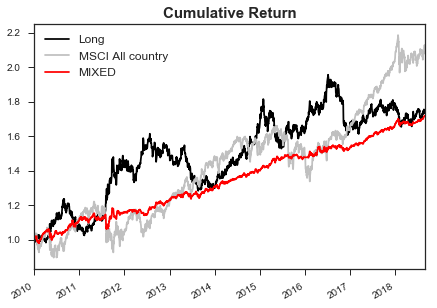

In [338]:
strats = ['BND_US_Long', 'ACWI', 'mixed']
names = ['Long', 'MSCI All country', 'MIXED']
color = ['k', 'silver', 'r']

mix.plot_cum(strats, names=names, color=color, logy=False, start='2009-12-31')

In [334]:
mix.get_stats(start='2009-12-31').tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
geam,1.59,2183,5.45,9.02,0.60,-15.20,6.21,7.46,0.80,0.19,7.19,59.22,1.20,92.20
kfam,1.87,2183,7.46,4.44,1.68,-7.97,6.74,3.63,1.92,0.04,9.51,77.67,1.07,88.52
gsam,1.78,2183,6.83,8.45,0.81,-10.74,5.21,7.41,0.70,0.30,13.55,63.11,1.20,90.42
gfam,1.41,2183,3.99,3.81,1.05,-5.93,3.79,3.33,1.10,0.07,5.12,63.11,1.48,94.90
mixed,1.78,2183,6.80,5.32,1.28,-9.08,6.22,4.24,1.51,0.15,0.00,70.87,1.28,95.81


In [330]:
rt = mix.cum.mixed.resample('M').ffill().pct_change()#.plot.bar()
rt[rt<-0.05]

2009-01-31   -0.060275
Freq: M, Name: mixed, dtype: float64

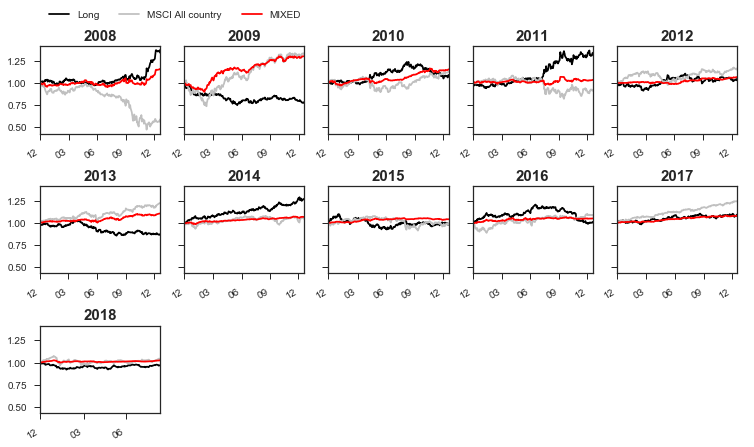

In [331]:
mix.plot_cum_yearly(strats, names=names, color=color)#, remove=range(2003,2013))